# Introduction to Pandas

## 1. Overview 

**What is Pandas?**

- Pandas is a powerful Python library used for data manipulation and analysis.
- It provides two main data structures: Series (1D) and DataFrame (2D), which are ideal for working with structured data, similar to Excel spreadsheets or SQL tables.
- Pandas is widely used in finance for tasks like:
    - Managing time-series data (e.g., stock prices).
    - Importing, cleaning, and analyzing large datasets (e.g., financial statements, market data).
    - Performing exploratory data analysis (EDA).

**Why pandas for Finance?**

- Data Handling: In finance, you often work with large, structured datasets that require cleaning, manipulation, and analysis.
- Efficiency: Pandas can handle millions of rows of financial data efficiently.
- Integration with Data Science: pandas works seamlessly with other libraries like NumPy and matplotlib for numerical operations and visualization, essential for financial modeling.

## 2. The DataFrame Class

At the core of Pandas is the `DataFrame`, a class designed to efficiently handle data in tabular form —i.e., data characterized by a columnar organization. To this end, the DataFrame class provides, for instance, column labeling as well as flexible indexing capabilities for the rows (records) of the data set, similar to a table in a relational database or an Excel spreadsheet.

### First steps

On a fundamental level, the DataFrame class is designed to manage **indexed** and **labeled** data, not too different from a SQL database table or a worksheet in a spread‐ sheet application. 

**Create DataFrame**

In [27]:
import pandas as pd

df = pd.DataFrame([10, 20, 30, 40], 
                 columns = ['numbers'],
                 index = ['a', 'b', 'c', 'd'])

df

,numbers
a,10
b,20
c,30
d,40


**Basic Operations**

In [9]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [10]:
df.columns

Index(['numbers'], dtype='object')

In [11]:
df.loc['c']

numbers    30
Name: c, dtype: int64

In [12]:
df.loc[['a', 'b']]

,numbers
a,10
b,20


In [13]:
df.iloc[1:3]

,numbers
b,20
c,30


In [14]:
df.sum()

numbers    100
dtype: int64

In [15]:
df.apply(lambda x: x ** 2)

,numbers
a,100
b,400
c,900
d,1600


In [16]:
df ** 2

,numbers
a,100
b,400
c,900
d,1600


**Enlarge DataFrame**

With a list

In [28]:
df['floats'] = [1.5, 2.5, 3.5, 4.5]
df

,numbers,floats
a,10,1.5
b,20,2.5
c,30,3.5
d,40,4.5


In [19]:
df['floats']

a    1.5
b    2.5
c    3.5
d    4.5
Name: floats, dtype: float64

With another DataFrame

In [29]:
df['names'] = pd.DataFrame(['Yves', 'Sandra', 'Lilli', 'Henry'],
                          index = ['d', 'a', 'b', 'c'])
df

,numbers,floats,names
a,10,1.5,Sandra
b,20,2.5,Lilli
c,30,3.5,Henry
d,40,4.5,Yves


*Beware of indexing*

In [30]:
df.append({'numbers': 100, 'floats': 5.75, 'names': 'Jil'},
                            ignore_index=True)

/var/folders/9m/57jm238n7yvg6p3srhy10dhw0000gn/T/ipykernel_82112/1042504447.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append({'numbers': 100, 'floats': 5.75, 'names': 'Jil'},


,numbers,floats,names
0,10,1.50,Sandra
1,20,2.50,Lilli
2,30,3.50,Henry
3,40,4.50,Yves
4,100,5.75,Jil


In [31]:
df = df.append(pd.DataFrame({'numbers': 100, 'floats': 5.75,
                             'names': 'Jil'}, index=['y',]))
df

/var/folders/9m/57jm238n7yvg6p3srhy10dhw0000gn/T/ipykernel_82112/964568728.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'numbers': 100, 'floats': 5.75,


,numbers,floats,names
a,10,1.50,Sandra
b,20,2.50,Lilli
c,30,3.50,Henry
d,40,4.50,Yves
y,100,5.75,Jil


In [26]:
df.dtypes

numbers    float64
floats     float64
names       object
dtype: object

Missing values

In [32]:
df = df.append(pd.DataFrame({'names': 'Liz'}, index=['z',]),
                        sort=False)
df

/var/folders/9m/57jm238n7yvg6p3srhy10dhw0000gn/T/ipykernel_82112/2361361414.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'names': 'Liz'}, index=['z',]),


,numbers,floats,names
a,10.0,1.50,Sandra
b,20.0,2.50,Lilli
c,30.0,3.50,Henry
d,40.0,4.50,Yves
y,100.0,5.75,Jil
z,NaN,NaN,Liz


Although there are now missing values, the majority of method calls will still work:

In [33]:
df[['numbers', 'floats']].mean()

numbers    40.00
floats      3.55
dtype: float64

In [34]:
df[['numbers', 'floats']].std()

numbers    35.355339
floats      1.662077
dtype: float64

### Second Steps

Handle matrices

In [ ]:
import numpy as np
np.random.seed(100)
a = np.random.standard_normal((9,4))
a

In [38]:
df = pd.DataFrame(a)
df.columns = ['No1', 'No2', 'No3', 'No4']
df

,0,1,2,3
0,-1.749765,0.342680,1.153036,-0.252436
1,0.981321,0.514219,0.221180,-1.070043
2,-0.189496,0.255001,-0.458027,0.435163
3,-0.583595,0.816847,0.672721,-0.104411
4,-0.531280,1.029733,-0.438136,-1.118318
5,1.618982,1.541605,-0.251879,-0.842436
6,0.184519,0.937082,0.731000,1.361556
7,-0.326238,0.055676,0.222400,-1.443217
8,-0.756352,0.816454,0.750445,-0.455947


In [40]:
df['No2'].mean()

0.701033094145646

Handle time series

In [42]:
dates = pd.date_range('2019-1-1', periods = 9, freq = 'M')
dates

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30'],
              dtype='datetime64[ns]', freq='M')

In [44]:
df.index = dates
df

,No1,No2,No3,No4
2019-01-31,-1.749765,0.342680,1.153036,-0.252436
2019-02-28,0.981321,0.514219,0.221180,-1.070043
2019-03-31,-0.189496,0.255001,-0.458027,0.435163
2019-04-30,-0.583595,0.816847,0.672721,-0.104411
2019-05-31,-0.531280,1.029733,-0.438136,-1.118318
2019-06-30,1.618982,1.541605,-0.251879,-0.842436
2019-07-31,0.184519,0.937082,0.731000,1.361556
2019-08-31,-0.326238,0.055676,0.222400,-1.443217
2019-09-30,-0.756352,0.816454,0.750445,-0.455947


In [45]:
df.values

array([[-1.74976547,  0.3426804 ,  1.1530358 , -0.25243604],
       [ 0.98132079,  0.51421884,  0.22117967, -1.07004333],
       [-0.18949583,  0.25500144, -0.45802699,  0.43516349],
       [-0.58359505,  0.81684707,  0.67272081, -0.10441114],
       [-0.53128038,  1.02973269, -0.43813562, -1.11831825],
       [ 1.61898166,  1.54160517, -0.25187914, -0.84243574],
       [ 0.18451869,  0.9370822 ,  0.73100034,  1.36155613],
       [-0.32623806,  0.05567601,  0.22239961, -1.443217  ],
       [-0.75635231,  0.81645401,  0.75044476, -0.45594693]])

## 3. Basic Analytics

### Convenvience methods built in

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9 entries, 2019-01-31 to 2019-09-30
Freq: M
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No1     9 non-null      float64
 1   No2     9 non-null      float64
 2   No3     9 non-null      float64
 3   No4     9 non-null      float64
dtypes: float64(4)
memory usage: 360.0 bytes


In [87]:
df.head()

,x,y
0,1.189622,-1.690617
1,-1.356399,-1.232435
2,-0.544439,-0.668172
3,0.007315,-0.612939
4,1.299748,-1.733096


In [88]:
df.tail()

,x,y
5,-0.983310,0.357508
6,-1.613579,1.470714
7,-1.188018,-0.549746
8,-0.940046,-0.827932
9,0.108863,0.507810


In [47]:
df.describe()

,No1,No2,No3,No4
count,9.000000,9.000000,9.000000,9.000000
mean,-0.150212,0.701033,0.289193,-0.387788
std,0.988306,0.457685,0.579920,0.877532
min,-1.749765,0.055676,-0.458027,-1.443217
25%,-0.583595,0.342680,-0.251879,-1.070043
50%,-0.326238,0.816454,0.222400,-0.455947
75%,0.184519,0.937082,0.731000,-0.104411
max,1.618982,1.541605,1.153036,1.361556


In [48]:
df.sum()

No1   -1.351906
No2    6.309298
No3    2.602739
No4   -3.490089
dtype: float64

In [49]:
df.mean()

No1   -0.150212
No2    0.701033
No3    0.289193
No4   -0.387788
dtype: float64

In [50]:
df.mean(axis = 0)

No1   -0.150212
No2    0.701033
No3    0.289193
No4   -0.387788
dtype: float64

In [51]:
df.mean(axis = 1)

2019-01-31   -0.126621
2019-02-28    0.161669
2019-03-31    0.010661
2019-04-30    0.200390
2019-05-31   -0.264500
2019-06-30    0.516568
2019-07-31    0.803539
2019-08-31   -0.372845
2019-09-30    0.088650
Freq: M, dtype: float64

In [52]:
df.cumsum()

,No1,No2,No3,No4
2019-01-31,-1.749765,0.342680,1.153036,-0.252436
2019-02-28,-0.768445,0.856899,1.374215,-1.322479
2019-03-31,-0.957941,1.111901,0.916188,-0.887316
2019-04-30,-1.541536,1.928748,1.588909,-0.991727
2019-05-31,-2.072816,2.958480,1.150774,-2.110045
2019-06-30,-0.453834,4.500086,0.898895,-2.952481
2019-07-31,-0.269316,5.437168,1.629895,-1.590925
2019-08-31,-0.595554,5.492844,1.852294,-3.034142
2019-09-30,-1.351906,6.309298,2.602739,-3.490089


Integrated NumPy function

In [54]:
np.mean(df)

/Users/tarikrouknyornia/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


No1   -0.150212
No2    0.701033
No3    0.289193
No4   -0.387788
dtype: float64

In [55]:
np.log(df)

/Users/tarikrouknyornia/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


,No1,No2,No3,No4
2019-01-31,NaN,-1.070957,0.142398,NaN
2019-02-28,-0.018856,-0.665106,-1.508780,NaN
2019-03-31,NaN,-1.366486,NaN,-0.832033
2019-04-30,NaN,-0.202303,-0.396425,NaN
2019-05-31,NaN,0.029299,NaN,NaN
2019-06-30,0.481797,0.432824,NaN,NaN
2019-07-31,-1.690005,-0.064984,-0.313341,0.308628
2019-08-31,NaN,-2.888206,-1.503279,NaN
2019-09-30,NaN,-0.202785,-0.287089,NaN


In [56]:
np.sqrt(abs(df))

,No1,No2,No3,No4
2019-01-31,1.322787,0.585389,1.073795,0.502430
2019-02-28,0.990616,0.717091,0.470297,1.034429
2019-03-31,0.435311,0.504977,0.676777,0.659669
2019-04-30,0.763934,0.903796,0.820196,0.323127
2019-05-31,0.728890,1.014757,0.661918,1.057506
2019-06-30,1.272392,1.241614,0.501876,0.917843
2019-07-31,0.429556,0.968030,0.854986,1.166857
2019-08-31,0.571173,0.235958,0.471593,1.201340
2019-09-30,0.869685,0.903578,0.866282,0.675238


In [57]:
np.sqrt(abs(df)).sum()

No1    7.384345
No2    7.075190
No3    6.397719
No4    7.538440
dtype: float64

In [58]:
100 * df + 100

,No1,No2,No3,No4
2019-01-31,-74.976547,134.268040,215.303580,74.756396
2019-02-28,198.132079,151.421884,122.117967,-7.004333
2019-03-31,81.050417,125.500144,54.197301,143.516349
2019-04-30,41.640495,181.684707,167.272081,89.558886
2019-05-31,46.871962,202.973269,56.186438,-11.831825
2019-06-30,261.898166,254.160517,74.812086,15.756426
2019-07-31,118.451869,193.708220,173.100034,236.155613
2019-08-31,67.376194,105.567601,122.239961,-44.321700
2019-09-30,24.364769,181.645401,175.044476,54.405307


### Basic visualization

In [59]:
from pylab import plt, mpl
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

<AxesSubplot:>

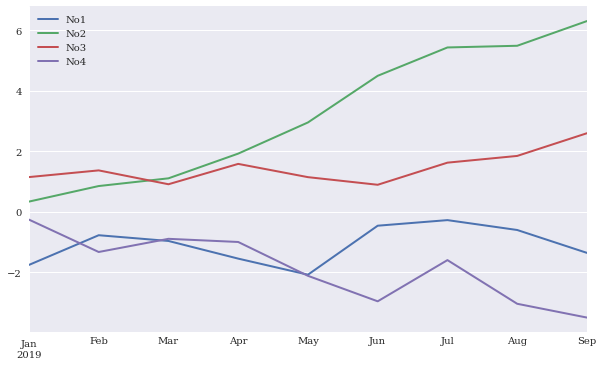

In [60]:
df.cumsum().plot(lw = 2.0, figsize = (10,6))

<AxesSubplot:>

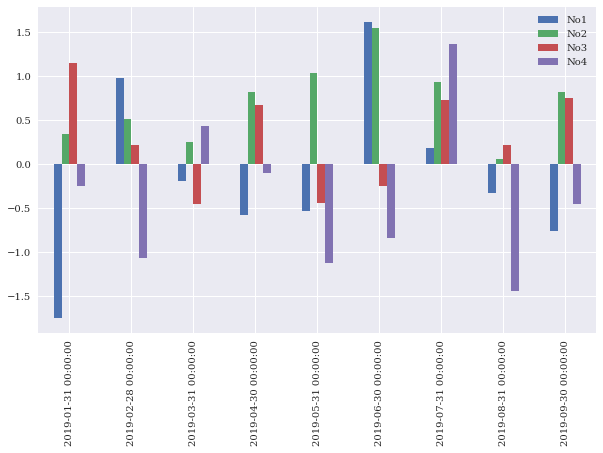

In [62]:
df.plot(kind = 'bar', figsize = (10,6))

## 4. The Series Class

The Series class characterized by the fact that it has only a single column of data. In that sense, it is a specialization of the DataFrame class that shares many but not all of its characteristics and capabilities. A Series object is obtained when a single column is selected from a multicolumn DataFrame object.

In [63]:
type(df)

pandas.core.frame.DataFrame

In [65]:
s = pd.Series(np.linspace(0,15,7), name = 'series')
s

0     0.0
1     2.5
2     5.0
3     7.5
4    10.0
5    12.5
6    15.0
Name: series, dtype: float64

In [66]:
type(s)

pandas.core.series.Series

In [68]:
s = df['No1']
s

2019-01-31   -1.749765
2019-02-28    0.981321
2019-03-31   -0.189496
2019-04-30   -0.583595
2019-05-31   -0.531280
2019-06-30    1.618982
2019-07-31    0.184519
2019-08-31   -0.326238
2019-09-30   -0.756352
Freq: M, Name: No1, dtype: float64

In [69]:
type(s)

pandas.core.series.Series

Main methods from `DataFrame` are available for `Series` objects.

In [71]:
s.mean()

-0.15021177307319458

<AxesSubplot:>

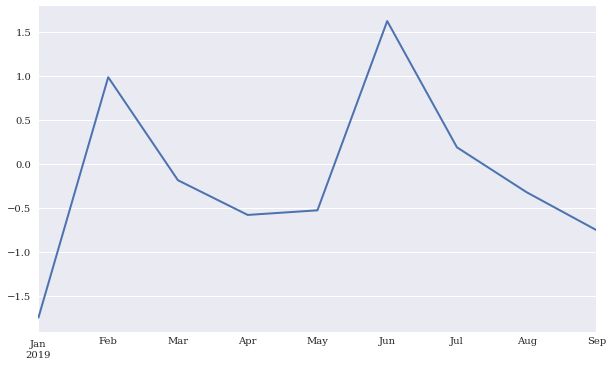

In [72]:
s.plot(lw=2.0, figsize = (10,6))

## 5. GroupBy Operations

`Pandas` has powerful and flexible grouping capabilities. They work similarly to grouping in SQL as well as pivot tables in Microsoft Excel. 

In [73]:
df['Quarter'] = ['Q1', 'Q1', 'Q1', 'Q2', 'Q2',
                              'Q2', 'Q3', 'Q3', 'Q3']
df

,No1,No2,No3,No4,Quarter
2019-01-31,-1.749765,0.342680,1.153036,-0.252436,Q1
2019-02-28,0.981321,0.514219,0.221180,-1.070043,Q1
2019-03-31,-0.189496,0.255001,-0.458027,0.435163,Q1
2019-04-30,-0.583595,0.816847,0.672721,-0.104411,Q2
2019-05-31,-0.531280,1.029733,-0.438136,-1.118318,Q2
2019-06-30,1.618982,1.541605,-0.251879,-0.842436,Q2
2019-07-31,0.184519,0.937082,0.731000,1.361556,Q3
2019-08-31,-0.326238,0.055676,0.222400,-1.443217,Q3
2019-09-30,-0.756352,0.816454,0.750445,-0.455947,Q3


**Simple grouping**

In [74]:
groups = df.groupby('Quarter')

In [75]:
groups.size()

Quarter
Q1    3
Q2    3
Q3    3
dtype: int64

**Basic operations**

In [76]:
groups.mean()

,No1,No2,No3,No4
Quarter,,,,
Q1,-0.319314,0.370634,0.305396,-0.295772
Q2,0.168035,1.129395,-0.005765,-0.688388
Q3,-0.299357,0.603071,0.567948,-0.179203


In [77]:
groups.max()

,No1,No2,No3,No4
Quarter,,,,
Q1,0.981321,0.514219,1.153036,0.435163
Q2,1.618982,1.541605,0.672721,-0.104411
Q3,0.184519,0.937082,0.750445,1.361556


Multiple operations at once

In [78]:
groups.aggregate([min,max]).round(2)

No1         No2         No3         No4      
          min   max   min   max   min   max   min   max
Quarter                                                
Q1      -1.75  0.98  0.26  0.51 -0.46  1.15 -1.07  0.44
Q2      -0.58  1.62  0.82  1.54 -0.44  0.67 -1.12 -0.10
Q3      -0.76  0.18  0.06  0.94  0.22  0.75 -1.44  1.36

**Grouping with multiple columns**

In [79]:
df['Odd_Even'] = ['Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even',
                               'Odd', 'Even', 'Odd']

In [80]:
groups = df.groupby(['Quarter', 'Odd_Even'])

In [81]:
groups.size()

Quarter  Odd_Even
Q1       Even        1
         Odd         2
Q2       Even        2
         Odd         1
Q3       Even        1
         Odd         2
dtype: int64

In [82]:
groups[['No1', 'No4']].aggregate([sum, np.mean])

No1                 No4          
                       sum      mean       sum      mean
Quarter Odd_Even                                        
Q1      Even      0.981321  0.981321 -1.070043 -1.070043
        Odd      -1.939261 -0.969631  0.182727  0.091364
Q2      Even      1.035387  0.517693 -0.946847 -0.473423
        Odd      -0.531280 -0.531280 -1.118318 -1.118318
Q3      Even     -0.326238 -0.326238 -1.443217 -1.443217
        Odd      -0.571834 -0.285917  0.905609  0.452805

## 6. Complex Selection

Often, data selection is accomplished by formulation of conditions on column values, and potentially combining multiple such conditions logically. 

In [83]:
data = np.random.standard_normal((10,2))
df = pd.DataFrame(data, columns = ['x', 'y'])

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       10 non-null     float64
 1   y       10 non-null     float64
dtypes: float64(2)
memory usage: 288.0 bytes


In [85]:
df.head()

,x,y
0,1.189622,-1.690617
1,-1.356399,-1.232435
2,-0.544439,-0.668172
3,0.007315,-0.612939
4,1.299748,-1.733096


**Conditions**

In [89]:
df['x'] > 0.5

0     True
1    False
2    False
3    False
4     True
5    False
6    False
7    False
8    False
9    False
Name: x, dtype: bool

In [93]:
(df['x'] > 0) & (df['y'] < 0)

0     True
1    False
2    False
3     True
4     True
5    False
6    False
7    False
8    False
9    False
dtype: bool

In [94]:
(df['x'] > 0) | (df['y'] < 0)

0     True
1     True
2     True
3     True
4     True
5    False
6    False
7     True
8     True
9     True
dtype: bool

In [98]:
df > 0

,x,y
0,True,False
1,False,False
2,False,False
3,True,False
4,True,False
5,False,True
6,False,True
7,False,False
8,False,False
9,True,True


**Conditional selection**

In [95]:
df[df['x'] > 0]

,x,y
0,1.189622,-1.690617
3,0.007315,-0.612939
4,1.299748,-1.733096
9,0.108863,0.507810


In [97]:
df[(df['x'] > 0) & (df['y'] < 0)]

,x,y
0,1.189622,-1.690617
3,0.007315,-0.612939
4,1.299748,-1.733096


In [96]:
df[(df.x > 0) | (df.y < 0)]

,x,y
0,1.189622,-1.690617
1,-1.356399,-1.232435
2,-0.544439,-0.668172
3,0.007315,-0.612939
4,1.299748,-1.733096
7,-1.188018,-0.549746
8,-0.940046,-0.827932
9,0.108863,0.507810


In [99]:
df[df > 0]

,x,y
0,1.189622,NaN
1,NaN,NaN
2,NaN,NaN
3,0.007315,NaN
4,1.299748,NaN
5,NaN,0.357508
6,NaN,1.470714
7,NaN,NaN
8,NaN,NaN
9,0.108863,0.507810


## 7. Concatenation, Join, Merge

Approaches to combine two simple data sets in the form of DataFrame objects.

In [100]:
df1 = pd.DataFrame(['100', '200', '300', '400'],
                   index=['a', 'b', 'c', 'd'],
                   columns = ['A',])
df1
                   

,A
a,100
b,200
c,300
d,400


In [101]:
df2 = pd.DataFrame(['200', '150', '50'],
                   index = ['f', 'b', 'd'],
                   columns = ['B',])
df2

,B
f,200
b,150
d,50


### Concatenation

Concatenation or appending basically means that rows are added from one `DataFrame` object to another one. This can be accomplished via the `append()` method or via the `pd.concat()` function. 

A major consideration is how the index values are handled.

In [102]:
df1.append(df2, sort=False)

/var/folders/9m/57jm238n7yvg6p3srhy10dhw0000gn/T/ipykernel_82112/50354407.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1.append(df2, sort=False)


,A,B
a,100,NaN
b,200,NaN
c,300,NaN
d,400,NaN
f,NaN,200
b,NaN,150
d,NaN,50


In [103]:
pd.concat((df1, df2), sort=False)

,A,B
a,100,NaN
b,200,NaN
c,300,NaN
d,400,NaN
f,NaN,200
b,NaN,150
d,NaN,50


In [104]:
pd.concat((df1, df2), ignore_index=True, sort=False)

,A,B
0,100,NaN
1,200,NaN
2,300,NaN
3,400,NaN
4,NaN,200
5,NaN,150
6,NaN,50


### Join

When joining the two data sets, the sequence of the DataFrame objects matters. Only the index values from the first DataFrame object are used. This default behavior is called a *left join*.

In [105]:
df1.join(df2)

,A,B
a,100,NaN
b,200,150
c,300,NaN
d,400,50


In [106]:
df2.join(df1)

,B,A
f,200,NaN
b,150,200
d,50,400


4 different join methods available, each leading to a different behavior with regard to how index values and the corresponding data rows are handled:
- `left`: preserves index values from left dataframe.
- `right`: preserves index values from right dataframe.
- `inner`: preserves index values found in both indices.
- `outer`: preserves all index values from both indices.

In [107]:
df1.join(df2, how='left')

,A,B
a,100,NaN
b,200,150
c,300,NaN
d,400,50


In [108]:
df1.join(df2, how='right')

,A,B
f,NaN,200
b,200,150
d,400,50


In [109]:
df1.join(df2, how='inner')

,A,B
b,200,150
d,400,50


In [110]:
df1.join(df2, how='outer')

,A,B
a,100,NaN
b,200,150
c,300,NaN
d,400,50
f,NaN,200


### Merge

While a join operation takes place based on the indices of the DataFrame objects to be joined, a merge operation typically takes place on a column shared between the two data sets.

In [111]:
c = pd.Series([250, 150, 50], index=['b', 'd', 'c'])
df1['C'] = c
df2['C'] = c

In [112]:
df1

,A,C
a,100,NaN
b,200,250.0
c,300,50.0
d,400,150.0


In [113]:
df2

,B,C
f,200,NaN
b,150,250.0
d,50,150.0


By default, the merge operation in this case takes place based on the single shared column C.

In [114]:
pd.merge(df1, df2)

,A,C,B
0,100,NaN,200
1,200,250.0,150
2,400,150.0,50


Can be explicit on which columns

In [115]:
pd.merge(df1, df2, on='C')

,A,C,B
0,100,NaN,200
1,200,250.0,150
2,400,150.0,50


Other merger operations

In [116]:
pd.merge(df1, df2, how='outer')

,A,C,B
0,100,NaN,200
1,200,250.0,150
2,300,50.0,NaN
3,400,150.0,50


In [117]:
pd.merge(df1, df2, left_on='A', right_on='B')

,A,C_x,B,C_y
0,200,250.0,200,NaN


In [118]:
pd.merge(df1, df2, left_on='A', right_on='B', how='outer')

,A,C_x,B,C_y
0,100,NaN,NaN,NaN
1,200,250.0,200,NaN
2,300,50.0,NaN,NaN
3,400,150.0,NaN,NaN
4,NaN,NaN,150,250.0
5,NaN,NaN,50,150.0


In [119]:
pd.merge(df1, df2, left_index=True, right_index=True)

,A,C_x,B,C_y
b,200,250.0,150,250.0
d,400,150.0,50,150.0


---

# Exercises

**Exercise 1: Create a DataFrame of Stock Prices and Volume**

Create a DataFrame that contains stock data for three different stocks: `AAPL`, `GOOGL`, and `AMZN` over five days. The DataFrame should have the following columns: `Date`, `Stock`, `Price`, and `Volume`. Then, display the DataFrame.

In [ ]:
# Your code here
import pandas as pd

# Creating a DataFrame with stock prices and volumes
data = {
    'Date': ['2023-09-01', '2023-09-02', '2023-09-03', '2023-09-04', '2023-09-05'],
    'Stock': ['AAPL', 'AAPL', 'GOOGL', 'GOOGL', 'AMZN'],
    'Price': [150.25, 153.50, 2800.50, 2830.75, 3400.00],
    'Volume': [1000, 1100, 1200, 1300, 1400]
}

df = pd.DataFrame(data)
print(df)

### Exercise 2: Calculate Percentage Change in Stock Prices

Using the DataFrame you created in Exercise 1, calculate the daily percentage change in stock prices and add a new column `Pct_Change` to store the results. Display the updated DataFrame.

In [ ]:
# Your code here
df['Pct_Change'] = df['Price'].pct_change()
print(df)

### Exercise 3: Filter Stocks Based on Price

Filter the DataFrame to display only the rows where the stock price is above $2000. Display the filtered DataFrame.

In [ ]:
# Your code here
filtered_df = df[df['Price'] > 2000]
print(filtered_df)

### Exercise 4: Add a New Column for Total Value

Add a new column to the DataFrame called `Total_Value`, which represents the total value of traded stock for each day (calculated as `Price * Volume`). Then display the updated DataFrame.

In [ ]:
# Your code here
df['Total_Value'] = df['Price'] * df['Volume']
print(df)

### Exercise 5: Group Data by Stock and Calculate the Average Price

Group the DataFrame by the `Stock` column and calculate the average stock price for each stock. Display the resulting DataFrame with the stock symbol and its average price.

In [ ]:
# Your code here
average_price = df.groupby('Stock')['Price'].mean()
print(average_price)

### Exercise 6: Generate a New DataFrame for Portfolio Analysis

Create a new DataFrame that represents a portfolio of investments. The DataFrame should contain the following columns: `Stock`, `Shares`, `Price_Per_Share`, and `Investment_Value` (calculated as `Shares * Price_Per_Share`). Populate the DataFrame with data for three stocks of your choice and display the DataFrame.

In [ ]:
# Your code here
portfolio_data = {
    'Stock': ['AAPL', 'GOOGL', 'AMZN'],
    'Shares': [10, 5, 3],
    'Price_Per_Share': [150.25, 2800.50, 3400.00]
}

portfolio_df = pd.DataFrame(portfolio_data)
portfolio_df['Investment_Value'] = portfolio_df['Shares'] * portfolio_df['Price_Per_Share']
print(portfolio_df)

### Exercise 7: Sort Stocks by Price

Sort the original DataFrame (from Exercise 1) by the `Price` column in descending order and display the sorted DataFrame.

In [ ]:
# Your code here
sorted_df = df.sort_values(by='Price', ascending=False)
print(sorted_df)

### Exercise 8: Calculate Moving Average of Stock Prices

For each stock, calculate the 2-day moving average of the stock prices. Create a new column `Moving_Avg` in the DataFrame and display the updated DataFrame.

In [ ]:
# Your code here
df['Moving_Avg'] = df['Price'].rolling(window=2).mean()
print(df)

### Exercise 9: Replace Missing Values

Assume that some stock prices in your DataFrame are missing (NaN values). Replace the missing values with the average price of the respective stock.

In [ ]:
# Your code here
# Simulating missing values
df.loc[1, 'Price'] = None

# Replacing missing values with the mean price of the respective stock
df['Price'].fillna(df['Price'].mean(), inplace=True)
print(df)

### Exercise 10: Rank Stocks by Volume

Rank the stocks based on their trading volume. Add a new column `Volume_Rank` that shows the rank of each stock based on its volume, with 1 being the highest. Display the updated DataFrame.

In [ ]:
# Your code here
df['Volume_Rank'] = df['Volume'].rank(ascending=False)
print(df)

### Exercise 11: Concatenate DataFrames Vertically

Create two DataFrames representing stock prices for different sets of stocks. Concatenate them vertically (i.e., one DataFrame below the other) to form a single DataFrame. Display the concatenated DataFrame.

In [ ]:
# Your code here
import pandas as pd

# DataFrame 1: Stock prices for AAPL and GOOGL
data1 = {
    'Stock': ['AAPL', 'GOOGL'],
    'Price': [150.25, 2800.50],
    'Date': ['2023-09-01', '2023-09-01']
}
df1 = pd.DataFrame(data1)

# DataFrame 2: Stock prices for AMZN and MSFT
data2 = {
    'Stock': ['AMZN', 'MSFT'],
    'Price': [3400.00, 305.50],
    'Date': ['2023-09-01', '2023-09-01']
}
df2 = pd.DataFrame(data2)

In [ ]:
# Concatenating the DataFrames vertically
concat_df = pd.concat([df1, df2], ignore_index=True)
print(concat_df)

### Exercise 12: Concatenate DataFrames Horizontally

Create two DataFrames representing different attributes of stocks. Concatenate them horizontally (i.e., side-by-side) so that each stock has multiple attributes. Display the concatenated DataFrame.

In [ ]:
# Your code here

# DataFrame 1: Stock names and prices
data1 = {
    'Stock': ['AAPL', 'GOOGL', 'AMZN'],
    'Price': [150.25, 2800.50, 3400.00]
}
df1 = pd.DataFrame(data1)

# DataFrame 2: Stock volumes
data2 = {
    'Volume': [1000, 1200, 1400]
}
df2 = pd.DataFrame(data2)

# Concatenating the DataFrames horizontally
concat_df = pd.concat([df1, df2], axis=1)
print(concat_df)

### Exercise 13: Merge Two DataFrames on a Common Column

Create two DataFrames: one containing stock prices and the other containing trading volumes for the same stocks. Merge the two DataFrames on the `Stock` column to combine the price and volume information. Display the merged DataFrame.

In [ ]:
# Your code here

# DataFrame 1: Stock prices
prices = {
    'Stock': ['AAPL', 'GOOGL', 'AMZN'],
    'Price': [150.25, 2800.50, 3400.00]
}
df_prices = pd.DataFrame(prices)

# DataFrame 2: Stock volumes
volumes = {
    'Stock': ['AAPL', 'GOOGL', 'AMZN'],
    'Volume': [1000, 1200, 1400]
}
df_volumes = pd.DataFrame(volumes)

# Merging the DataFrames on 'Stock' column
merged_df = pd.merge(df_prices, df_volumes, on='Stock')
print(merged_df)

### Exercise 14: Merge DataFrames with Different Column Names (Using `left_on` and `right_on`)

Create two DataFrames: one containing stock prices with the column name `Ticker`, and the other containing volumes with the column name `Stock`. Merge the two DataFrames using `left_on` and `right_on` to match the appropriate columns. Display the merged DataFrame.

In [ ]:
# Your code here

# DataFrame 1: Stock prices with 'Ticker' column
prices = {
    'Ticker': ['AAPL', 'GOOGL', 'AMZN'],
    'Price': [150.25, 2800.50, 3400.00]
}
df_prices = pd.DataFrame(prices)

# DataFrame 2: Stock volumes with 'Stock' column
volumes = {
    'Stock': ['AAPL', 'GOOGL', 'AMZN'],
    'Volume': [1000, 1200, 1400]
}
df_volumes = pd.DataFrame(volumes)

# Merging the DataFrames on different column names
merged_df = pd.merge(df_prices, df_volumes, left_on='Ticker', right_on='Stock')
print(merged_df)

### Exercise 15: Perform an Inner Join

Create two DataFrames, one containing stock prices for AAPL, GOOGL, and AMZN, and another containing volumes for AAPL and AMZN. Perform an inner join on the `Stock` column to include only the stocks that are common to both DataFrames. Display the result.

In [ ]:
# Your code here

# DataFrame 1: Stock prices
prices = {
    'Stock': ['AAPL', 'GOOGL', 'AMZN'],
    'Price': [150.25, 2800.50, 3400.00]
}
df_prices = pd.DataFrame(prices)

# DataFrame 2: Stock volumes (only AAPL and AMZN)
volumes = {
    'Stock': ['AAPL', 'AMZN'],
    'Volume': [1000, 1400]
}
df_volumes = pd.DataFrame(volumes)

# Performing an inner join on 'Stock' column
inner_join_df = pd.merge(df_prices, df_volumes, on='Stock', how='inner')
print(inner_join_df)

### Exercise 16: Perform a Left Join

Using the same DataFrames from Exercise 15, perform a left join to include all stocks from the price DataFrame, and add the volume where it is available. If the volume is missing, the result should show `NaN`. Display the result.

In [ ]:
# Your code here

# Performing a left join on 'Stock' column
left_join_df = pd.merge(df_prices, df_volumes, on='Stock', how='left')
print(left_join_df)

### Exercise 17: Perform a Right Join

Using the same DataFrames from Exercise 15, perform a right join to include all stocks from the volume DataFrame, and add the price where it is available. If the price is missing, the result should show `NaN`. Display the result.

In [ ]:
# Your code here

# Performing a right join on 'Stock' column
right_join_df = pd.merge(df_prices, df_volumes, on='Stock', how='right')
print(right_join_df)

### Exercise 18: Combine Multiple DataFrames Using `concat`

Create three DataFrames that each contain stock prices for different stocks over different dates. Concatenate them vertically to form a single DataFrame with all the stock prices over time. Display the result.

In [ ]:
# Your code here

# DataFrame 1: Stock prices for AAPL
data1 = {
    'Date': ['2023-09-01', '2023-09-02'],
    'Stock': ['AAPL', 'AAPL'],
    'Price': [150.25, 153.50]
}
df1 = pd.DataFrame(data1)

# DataFrame 2: Stock prices for GOOGL
data2 = {
    'Date': ['2023-09-01', '2023-09-02'],
    'Stock': ['GOOGL', 'GOOGL'],
    'Price': [2800.50, 2820.75]
}
df2 = pd.DataFrame(data2)

# DataFrame 3: Stock prices for AMZN
data3 = {
    'Date': ['2023-09-01', '2023-09-02'],
    'Stock': ['AMZN', 'AMZN'],
    'Price': [3400.00, 3420.25]
}
df3 = pd.DataFrame(data3)

# Concatenating the DataFrames
concat_df = pd.concat([df1, df2, df3], ignore_index=True)
print(concat_df)